In [1]:
import pandas as pd
import numpy as np
from random import random, normalvariate
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
real_data=pd.read_csv('FinalNSFTopicDataFrame.csv')
df=real_data
n_topics=50
titles=['Waves and Propagation',
'Innovation, Health Innovation',
'Tectonics',
'Environmental Ecology/ Field Ecology',
'Fluid dynamics',
'Polymers/ Material Science',
'REU/Undergraduate Development',
'Genetics/Population Genetics',
'Structural/civil Engineering',
'Solid State Physics',
'Data Science',
'Robotics',
'Outreach/Workshops',
'Human Development/Graph Theory Cross Over',
'Chemistry',
'Policy/Research Implications',
'Ocean Sciences',
'Chemistry Labs',
'Math',
'Mollecular and Cellular Biosciences',
'Collaborative Efforts',
'Climate Change',
'Networks',
'Medical Technology/Detection',
'Computational Approaches',
'Evolutionary Ecology',
'Water in the Environment',
'Archeology',
'Bioengineering',
'Linguistics',
'Human Cognition',
'Geology/Minerology',
'Particle/Nuclear Physics',
'Optics',
'STEM Education Programs',
'Nonlinear Dynamics',
'Energy and Engineering',
'Marine Biology',
'Plants',
'Genetics of Disease',
'Conference Funding',
'Professional Development for URM',
'Teaching STEM',
'Computer Network Systems',
'Application, Risk Management',
'Molecular Dynamics',
'Astronomy',
'Heliophysics',
'Computer Science',
'Neuroscience'
]
title_dict={}
for i,j in enumerate(titles):
    title_dict['Topic_'+str(i)]=j

In [5]:
term_topic=pd.read_csv('Term-Topic Ouputs for NSF 10 Model 50 Topic Per Model Run.csv')

In [6]:
term_topic

,Unnamed: 0,Unnamed: 1,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,...,Topic40,Topic41,Topic42,Topic43,Topic44,Topic45,Topic46,Topic47,Topic48,Topic49
0,Model 0,Word 0,"('water', 5487.291933962694)","('defect', 1801.25446207775)","('optical', 9768.289144889033)","('flow', 12330.815578340322)","('urban', 6143.7600880436485)","('model', 4974.049314562758)","('cell', 15013.773985453523)","('ocean', 8976.317730031893)",...,"('chemistry', 15584.934288952145)","('group', 7016.834837809196)","('conference', 10063.884435854257)","('gene', 10338.604600354683)","('data', 62676.46542486061)","('plant', 20034.618550856503)","('quantum', 11011.30885488891)","('software', 9662.806078712187)","('ecosystem', 6802.807095302563)","('energy', 15802.446974326256)"
1,Model 0,Word 1,"('international', 4999.161786843311)","('color', 1739.9241815316905)","('device', 9499.808957448276)","('model', 10028.143312118274)","('city', 3811.1016934784707)","('surface', 3481.2565391255653)","('brain', 9545.248842198796)","('marine', 4091.1783828928874)",...,"('chemical', 15485.209133129598)","('space', 4739.255029723248)","('scientist', 7658.71512066054)","('dna', 8179.921897682742)","('information', 7732.158091451541)","('specie', 10786.817877044614)","('molecule', 3389.7283032164137)","('tool', 4690.231143073688)","('change', 6735.366260663916)","('power', 11555.132800123753)"
2,Model 0,Word 2,"('environmental', 3427.6756481975735)","('grain', 813.4426771926012)","('image', 5376.755286913668)","('fluid', 7474.844007502702)","('environmental', 3452.480206065763)","('stress', 2826.387360180508)","('tissue', 5220.135962934858)","('support', 3780.928591592669)",...,"('reaction', 11661.112346118105)","('geometry', 4382.988560663976)","('international', 7303.566838647027)","('sequence', 6804.477393701712)","('analysis', 6586.763293810756)","('genetic', 7259.854207618743)","('atom', 2332.474227404166)","('community', 3673.6051460619733)","('specie', 6550.821683556114)","('performance', 8922.706248487406)"
3,Model 0,Word 3,"('collaboration', 2486.02480782515)","('beam', 714.9126472157783)","('laser', 4808.193723996161)","('particle', 6722.981945486214)","('food', 2940.163327548408)","('earth', 2680.4366745005805)","('neural', 4291.498080781202)","('sample', 2892.4737800259572)",...,"('catalyst', 5716.424219137354)","('geometric', 4318.736500358925)","('meeting', 6625.678009949511)","('genome', 5683.666042098229)","('tool', 6031.0787677518865)","('evolution', 6072.17088785873)","('information', 2233.026957484933)","('language', 3590.5229775240177)","('community', 5340.056670079797)","('compute', 7260.041151736858)"
4,Model 0,Word 4,"('university', 1799.461786521907)","('accelerator', 597.1320735693479)","('application', 4193.206031862917)","('process', 6533.422631969227)","('land', 2579.0792413298245)","('deformation', 2672.3081857868815)","('activity', 3677.5360248829506)","('measurement', 2709.91898944299)",...,"('metal', 5496.829971029745)","('dimensional', 3477.9377417118276)","('support', 6452.278762700651)","('expression', 3284.0082158869154)","('large', 5651.920888270943)","('gene', 5843.477542069892)","('state', 2205.438883307909)","('program', 3402.960929378119)","('ecological', 5307.055236178646)","('application', 7158.017918077204)"
5,Model 0,Word 5,"('wastewater', 1193.0054720236365)","('material', 463.960858411482)","('field', 3925.95827650789)","('transport', 6420.581542888568)","('spatial', 2421.982977665818)","('pressure', 2328.5152045856557)","('model', 3635.6574628716958)","('carbon', 2551.7367840653233)",...,"('professor', 5001.752902902264)","('topology', 3069.05791033324)","('researcher', 5920.504305387683)","('rna', 2895.682232172941)","('network', 5431.748734617595)","('animal', 5013.084619216097)","('molecular', 1705.2264505281587)","('code', 3046.7003674031207)","('forest', 4728.274205349118)","('design', 6657.587559472568)"
6,Model 0,Word 6,"('collaborative', 1170.8233209291127)","('mechanic', 407.3066231307117)","('light', 3680.

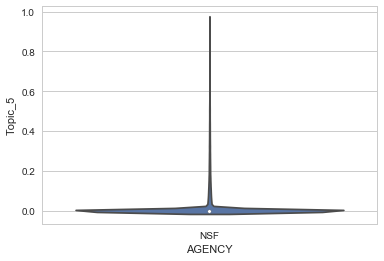

In [9]:
#Scripts for examining agency differences
df.groupby('AGENCY')['FY_TOTAL_COST'].describe()
sns.violinplot(x='AGENCY',y='Topic_5',data=df)

In [10]:
#Put data into tidy format
melted=df.melt(value_vars=['Topic_'+str(x) for x in range(n_topics)],id_vars=['AGENCY','FY_TOTAL_COST','FY'],var_name='Topic',value_name='Topic Proportion')

#Calculate proportion of project funding that went towards a particular topic
melted['Topic Funding']=melted['FY_TOTAL_COST']*melted['Topic Proportion']


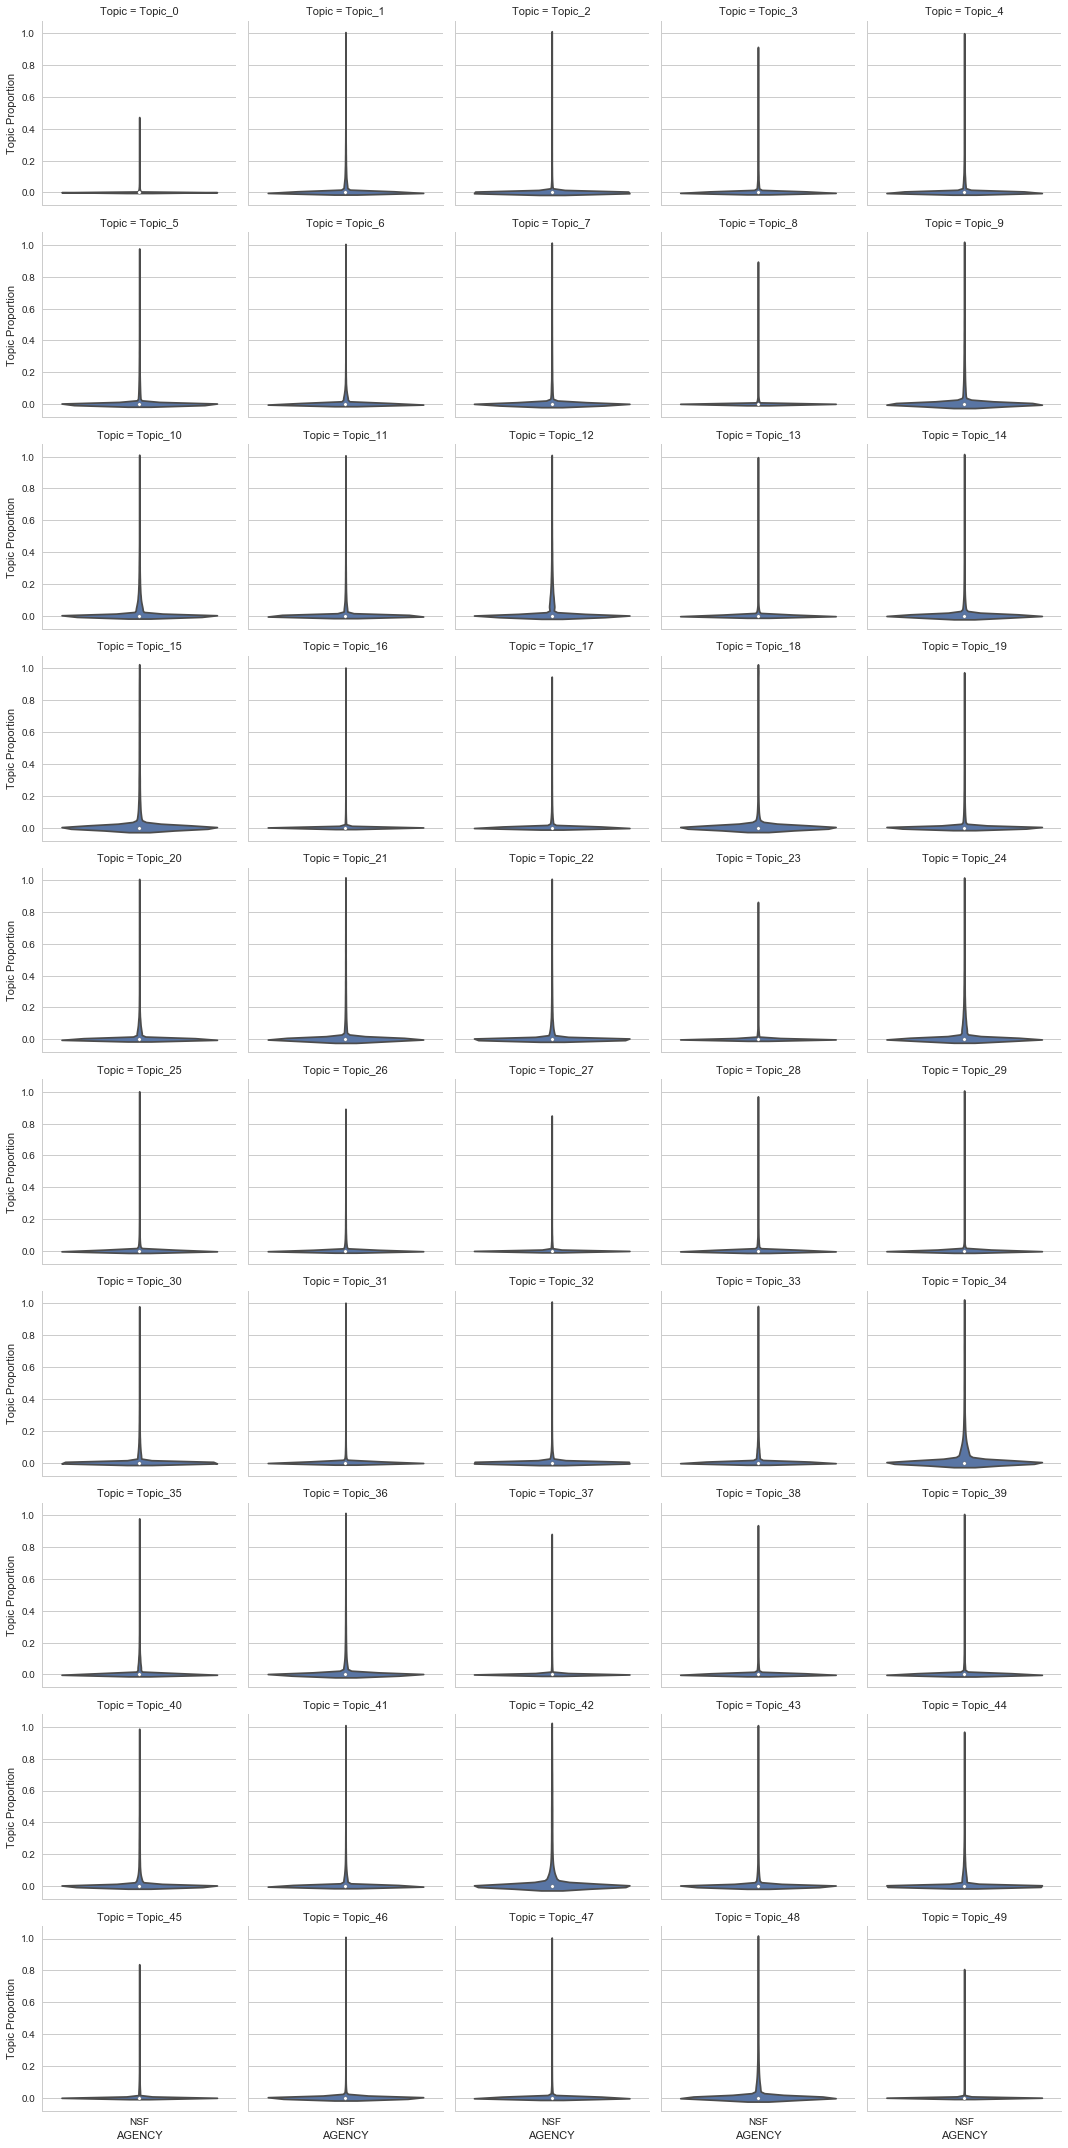

In [11]:
#############3
#Violinplot distribution by agency and topic
###############

agencies=['NSF']#Add whichever agencies you think are important in the order you'd like

#Initialize a grid of plots 
grid = sns.FacetGrid(melted, col="Topic",hue='AGENCY',
                     col_wrap=5)

# Draw a violinplot for each topic, by agency if there are more than one
grid.map(sns.violinplot, "AGENCY", "Topic Proportion",order=agencies)

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

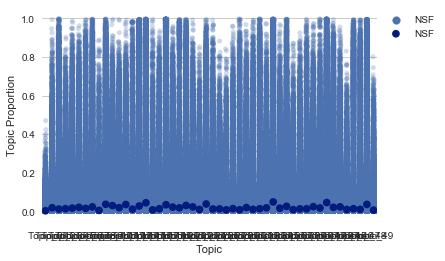

In [12]:
###################3
#Another way to visalize: the mean for each topic and all data points
#This is very ugly if you have a lot of topics and a lot of observations!
##########################
sns.set(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="Topic", y="Topic Proportion", hue="AGENCY",
              data=melted, dodge=True, alpha=.25, zorder=1,jitter=0.1)

# Show the conditional means
sns.pointplot(x="Topic", y="Topic Proportion", hue="AGENCY",
              data=melted, dodge=.532, join=False, palette="dark",
              markers="o", scale=.75, ci=None)
plt.legend(bbox_to_anchor=[1,1])

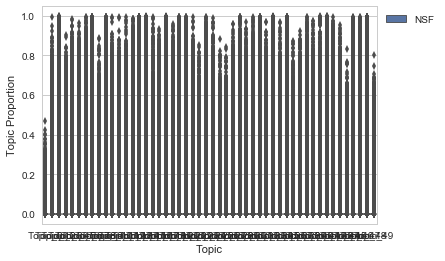

In [13]:
######################
#Visualize the boxplot of topic proportion by agency by topic
#####################

sns.boxplot(x='Topic',y='Topic Proportion',hue='AGENCY',data=melted)
plt.legend(bbox_to_anchor=[1,1])

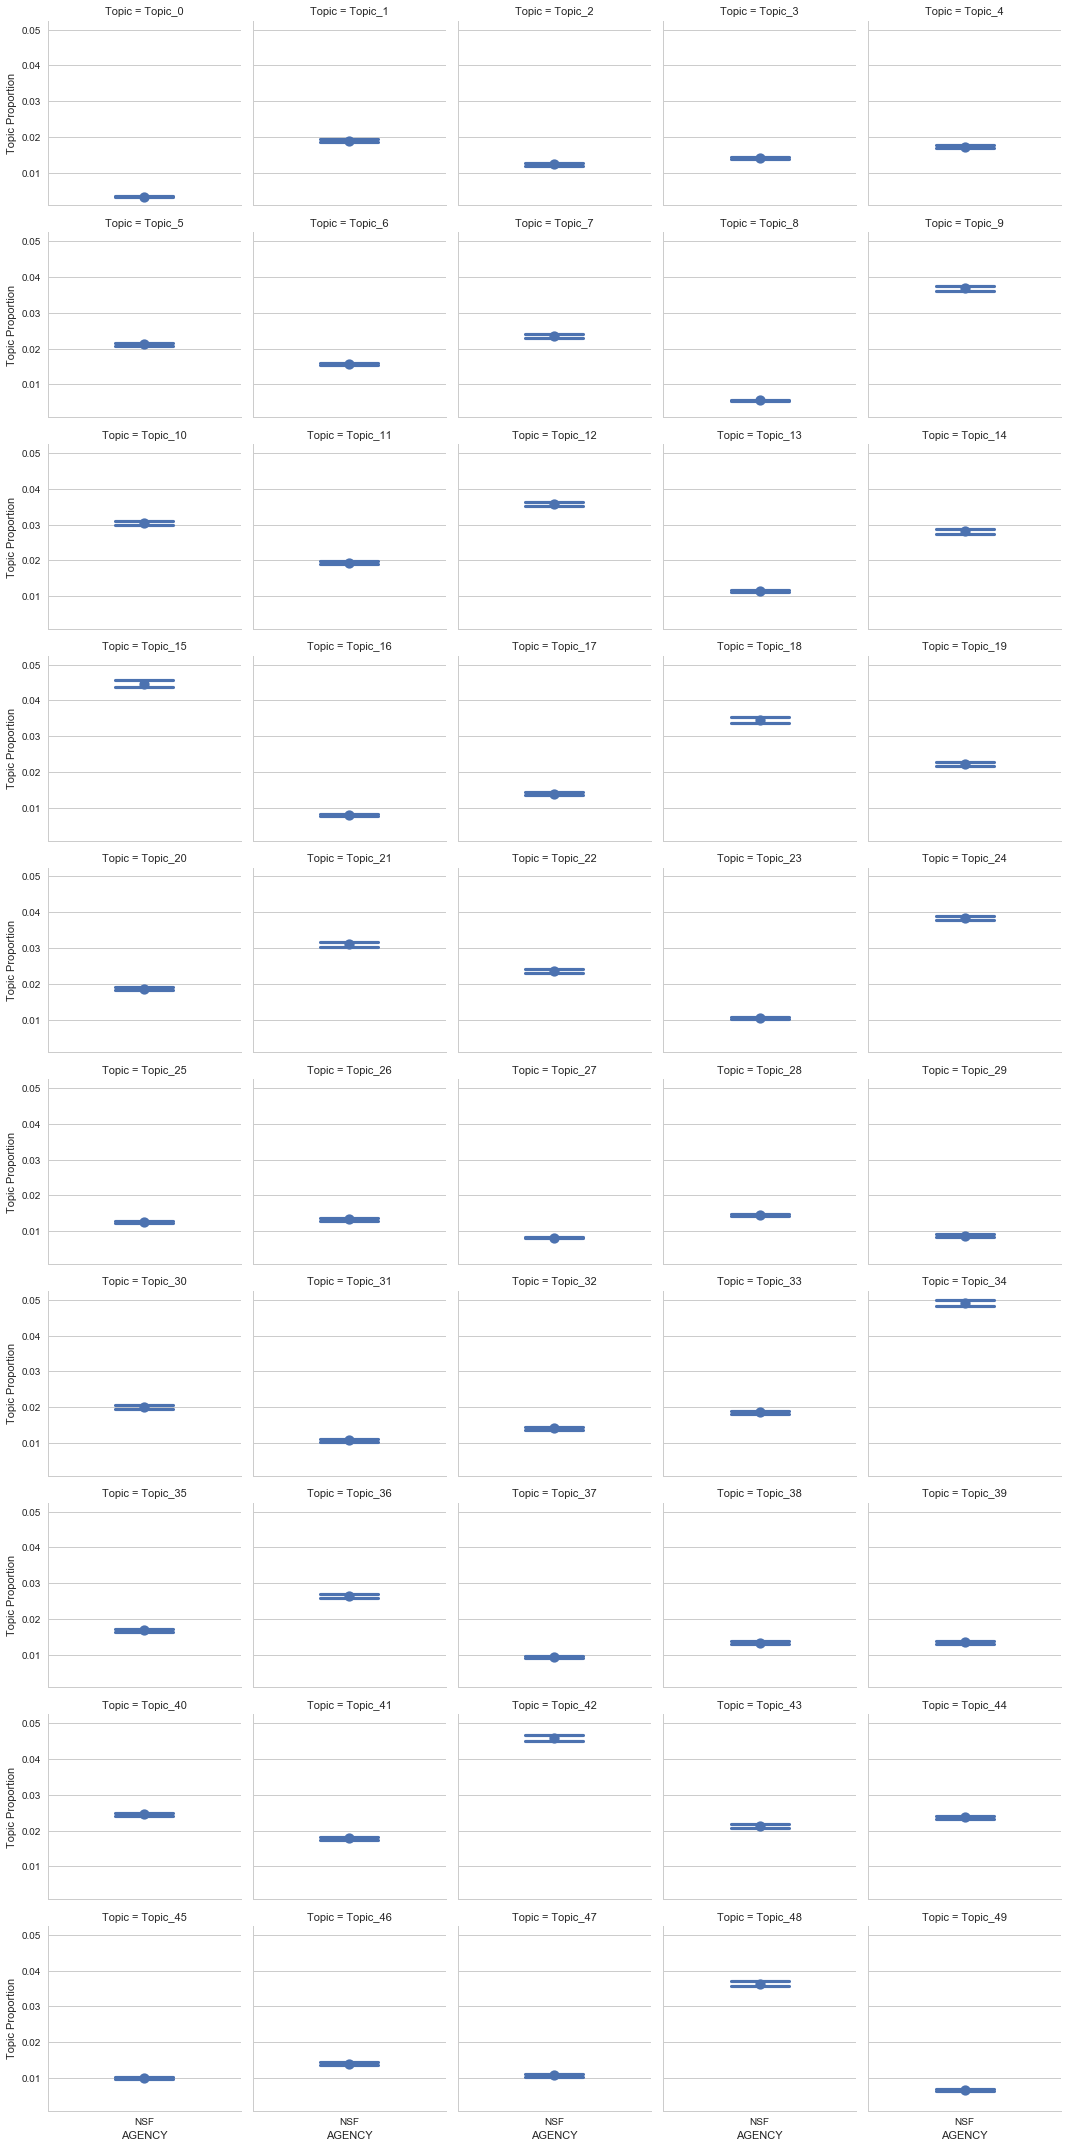

In [14]:
#Initialize a grid of plots 
grid = sns.FacetGrid(melted, col="Topic",hue='AGENCY',
                     col_wrap=5)

# Draw a barplot for each agency at each topic
grid.map(sns.pointplot, "AGENCY", "Topic Proportion",order=agencies,capsize=.3)


# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

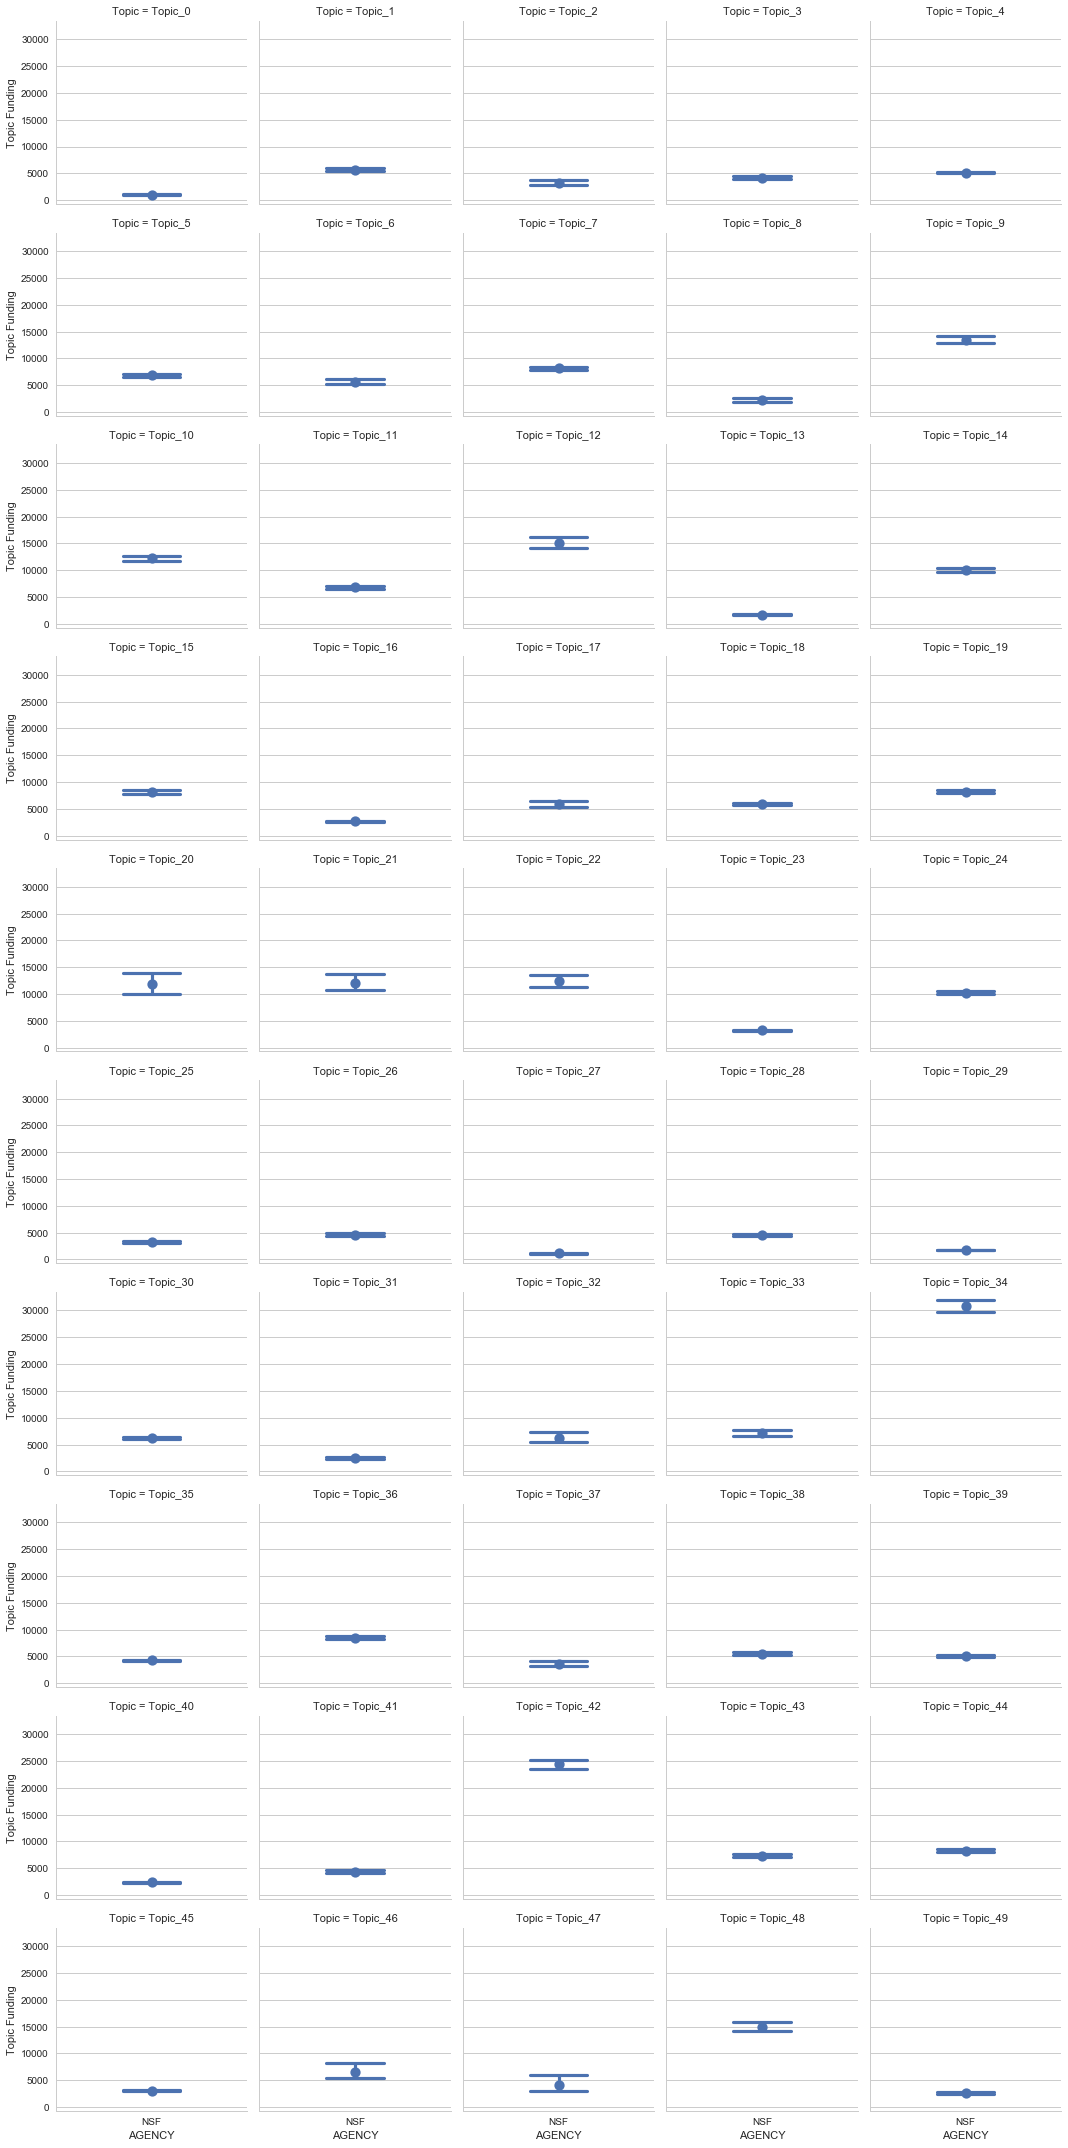

In [18]:
#Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(melted, col="Topic",hue='AGENCY',
                     col_wrap=5)

# Draw a line plot to show the trajectory of each random walk
grid.map(sns.pointplot, "AGENCY", "Topic Funding",order=agencies,capsize=.3)

# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
#         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

Text(0.5, 0, 'Average Proportion of Topic in A Document Per Agency')

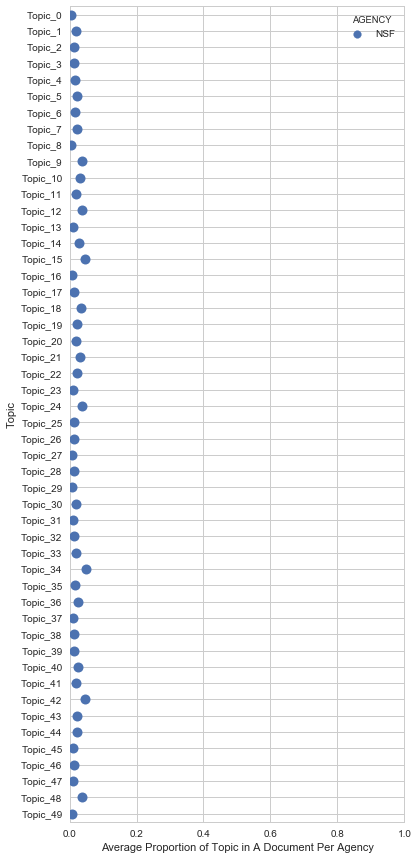

In [19]:
###############
#Create a melted database that shows the mean for each topic by agency
melted_means=df.groupby('AGENCY')[['Topic_'+str(x) for x in range(n_topics)]].mean().loc[agencies].reset_index().melt(value_vars=['Topic_'+str(x) for x in range(n_topics)],id_vars=['AGENCY'],var_name='Topic',value_name='Topic Proportion')

#Mean on each topic by agency
fig=plt.figure(figsize=(6,15))
g=sns.stripplot(data=melted_means,y='Topic',x='Topic Proportion',hue='AGENCY',size=10)
plt.xlim(0,1)
g.yaxis.grid(True)
plt.xlabel('Average Proportion of Topic in A Document Per Agency')

Text(0.5, 0, 'Total Funding To Topic in Grant Per Agency')

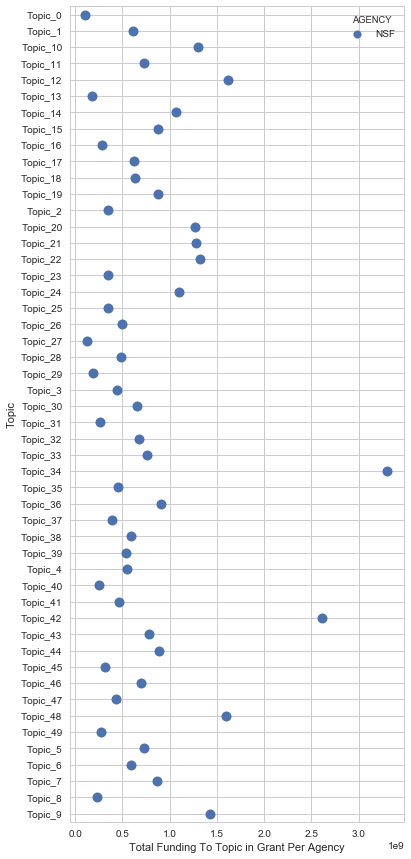

In [21]:
#Sum of funding on each topic by agency
melted_totals=pd.DataFrame(melted.groupby(['AGENCY','Topic'])['Topic Funding'].sum()).reset_index()

#Same plot as above, but sum of funding for 
fig=plt.figure(figsize=(6,15))
g=sns.stripplot(data=melted_totals,y='Topic',x='Topic Funding',hue='AGENCY',size=10)
g.yaxis.grid(True)
plt.xlabel('Total Funding To Topic in Grant Per Agency')

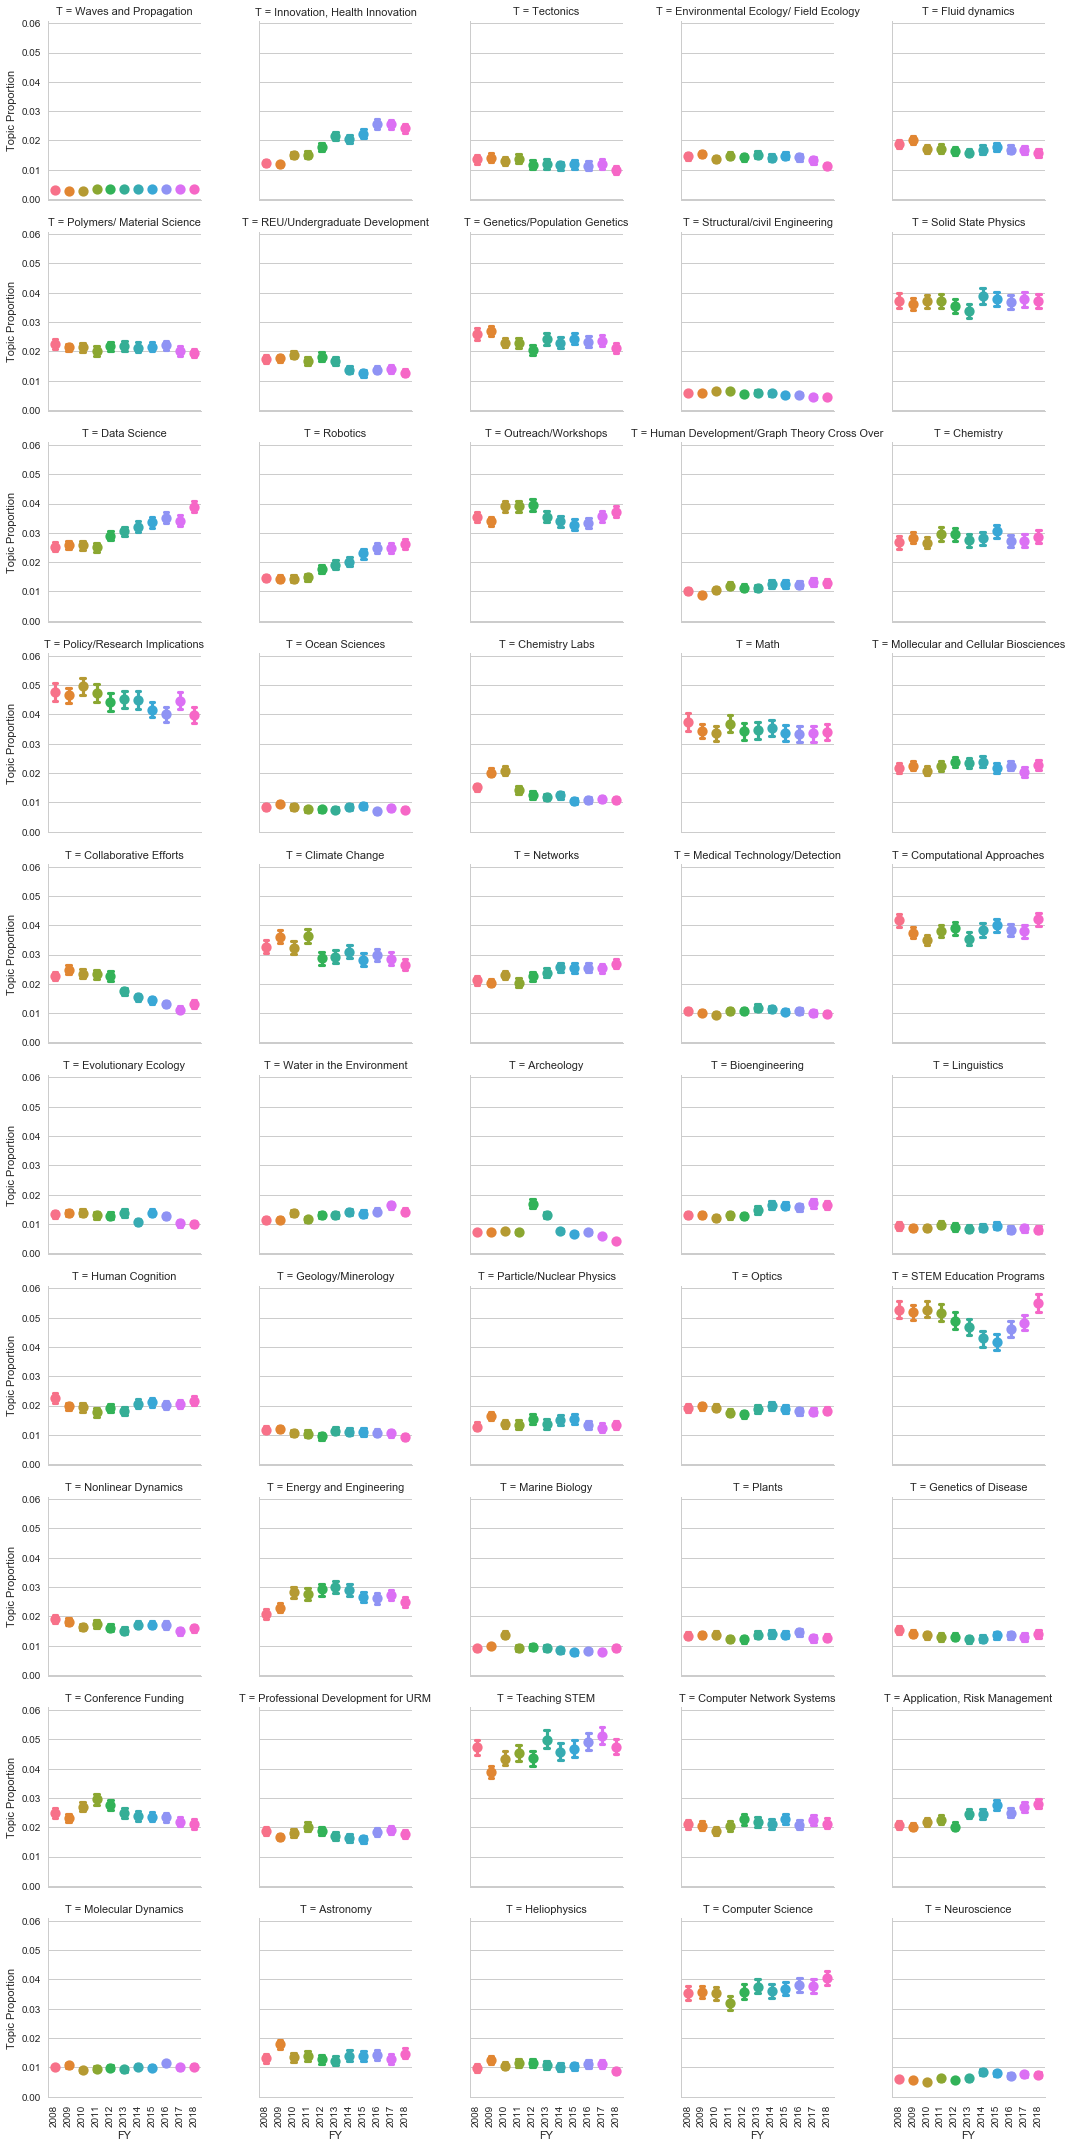

In [22]:
###############
#Create a plot showing topic funding over time +/- on SD for the overall database.
###############
melted['T']=melted['Topic'].apply(lambda x: title_dict[x])

#Initialize a grid of plots with an Axes for each topic
grid = sns.FacetGrid(melted, col="T",hue='FY', #T is used because that is the proper topic name
                     col_wrap=5)

# Draw a line plot to show the trajectory over time
grid.map(sns.pointplot, "FY", "Topic Proportion",order=range(2008,2019),capsize=.3)


grid.set_xticklabels(rotation=90)

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
plt.savefig('Trends in Topic Proportion NSF LDA.png',dpi=900,bbox_inches='tight')

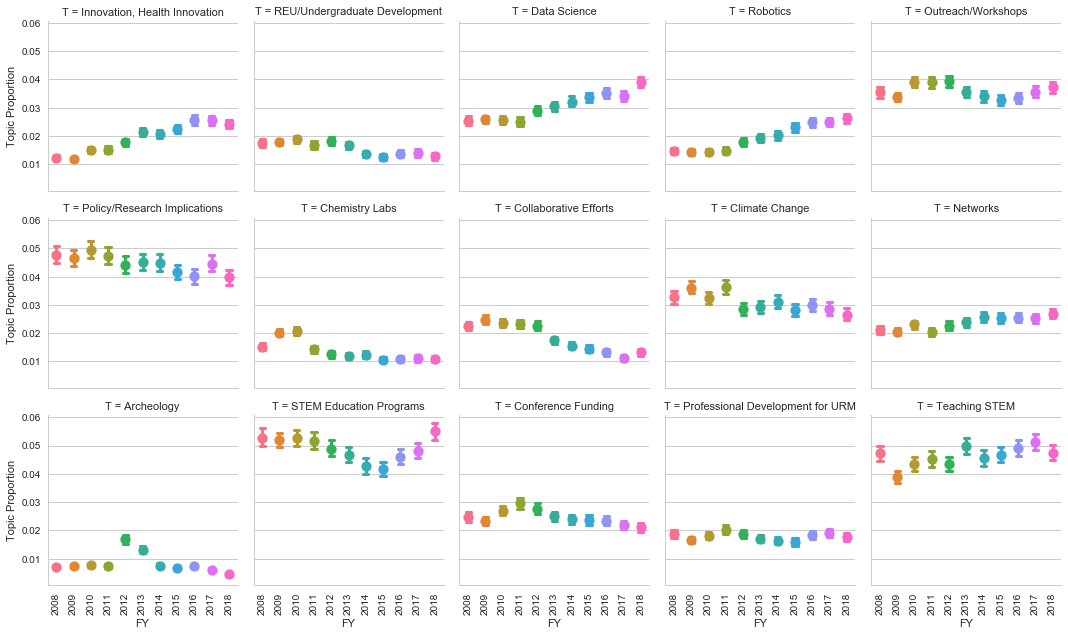

In [23]:
#Same plot as above, but uses only a subset of topics that had interesting patterns

#Initialize a grid of plots for each area of interest
grid = sns.FacetGrid(melted.loc[melted['Topic'].isin(['Topic_'+str(x) for x in [1,6, 10,11,12,15,17, 20, 21, 22,27,34, 40, 41, 42]]  )                                    
                               ], col="T",hue='FY',
                     col_wrap=5)

# Draw a line plot to show the trajectory over time
grid.map(sns.pointplot, "FY", "Topic Proportion",order=range(2008,2019),capsize=.3)


grid.set_xticklabels(rotation=90)

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

plt.savefig('Trends in Topic Proportion NSF LDA Interesting Topics.png',dpi=900,bbox_inches='tight')

In [ ]:
##################3
#Additional variables we should consider analyzing further
######################
real_data[[ 'FY',  'CONTACT_PI_PROJECT_LEADER',
       'ORGANIZATION_NAME', 'CFDA_CODE', 'FY_TOTAL_COST']].head()

In [24]:
################333
#Examine the full abstracts highly representative of a single topic to better describe them
##################

threshold=.9
for topic in range(50):
    print('Topic:'+str(topic))
    mini=real_data.loc[real_data['Topic_'+str(topic)]>threshold,'ABSTRACT']
    print('{} abstracts have a proportion greater than {} of this topic. Abstracts posted below'.format(len(mini),threshold))
    if len(mini)<5:
        for x in mini:
            print(x)
    else:
        for x in mini[:5]:
            print(x)

Topic:0
0 abstracts have a proportion greater than 0.9 of this topic. Abstracts posted below
Topic:1
3 abstracts have a proportion greater than 0.9 of this topic. Abstracts posted below
This Small Business Innovation Research (SBIR) Phase I project is focused on developing an innovative catheter design for peritoneal dialysis patients that is not reliant on patient compliance. Currently, 50% of PD patients (on average) experience peritonitis within the first 18 months. The risk of infection rapidly multiplies in subsequent months. Treatment for peritonitis includes long-term antibiotic treatment that causes multiple side effects and does not always eradicate the infection. Every year, roughly 25-50% of PD patients are forced to switch to HD as a result of complications from infections.  Such complications can involve catheter removal, which costs at an average of $20,000 per infection episode, and ~$200Million annual cost to the healthcare system. Many more patients are never administe

In [25]:
##############3
#Getting the starting sentences for all abstracts highly representative of a single topic
###############

for topic in range(50):
    print('Topic:'+str(topic))
    mini=real_data.loc[real_data['Topic_'+str(topic)]>threshold,'ABSTRACT']
    print('{} abstracts have a proportion greater than {} of this topic. Abstracts posted below'.format(len(mini),threshold))
    print(mini)

Topic:0
0 abstracts have a proportion greater than 0.9 of this topic. Abstracts posted below
Series([], Name: ABSTRACT, dtype: object)
Topic:1
3 abstracts have a proportion greater than 0.9 of this topic. Abstracts posted below
41662    This Small Business Innovation Research (SBIR)...
64771    This Small Business Innovation Research Phase ...
84890    The broader impact/commercial potential of thi...
Name: ABSTRACT, dtype: object
Topic:2
99 abstracts have a proportion greater than 0.9 of this topic. Abstracts posted below
5164      Understanding continental structure, basin dev...
6632      0742263  HoleAbstractThe project will address ...
7197      Within subduction zones, one tectonic plate di...
8581      This multidisciplinary research aims to measur...
8619      This multidisciplinary research aims to measur...
8626      Bylerly in 1937 made the observation of early ...
9065      The investigators on this project are studying...
9538      The collision of thickened crust with sub

In [26]:
#Number of cases where topic proportion is greater than 50% (ie each document can only be included once)
#About 50% of our cases have at least 50% of their topic distribution in a single topic
len(melted.loc[melted['Topic Proportion']>.5])

53095

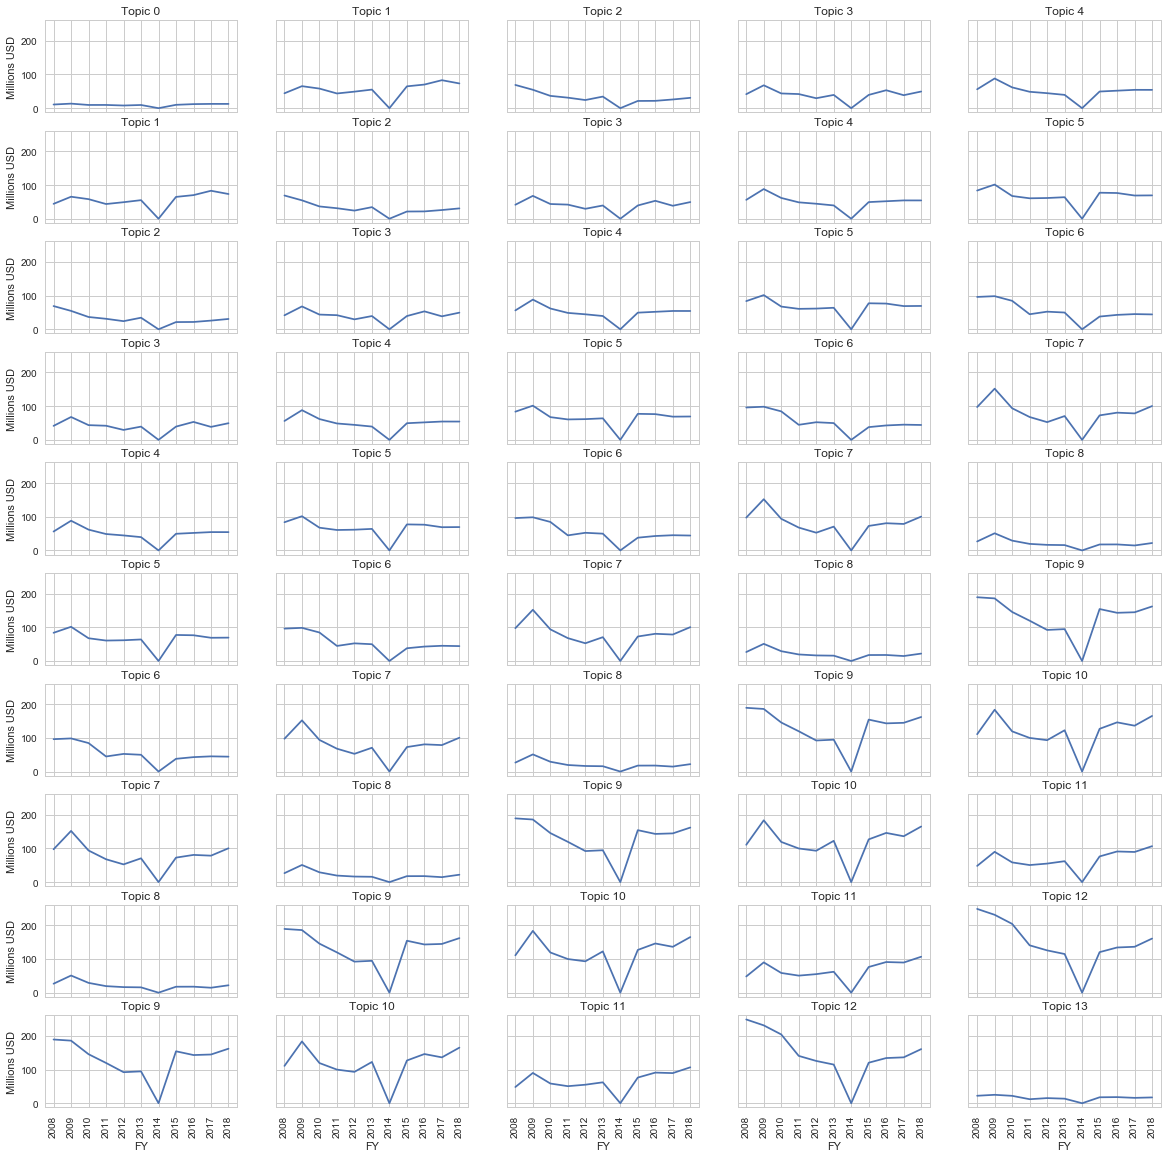

In [27]:
fig,ax=plt.subplots(10,5,sharey=True,sharex=True, figsize=[20,20])
for y in range(5):
    for x in range(10):
        topic_num=x+y
        melted.groupby(['Topic','FY'])['Topic Funding'].sum().apply(lambda x: x/1000000)['Topic_'+str(topic_num)].plot(ax=ax[x,y])
        plt.sca(ax[x,y])
        plt.xticks(np.arange(2008,2019),rotation=90)
        plt.ylabel('Millions USD')
        plt.title('Topic '+str(topic_num))
plt.savefig('Total Spending NSF By Topic.png',dpi=900,bbox_inches='tight')


In [28]:
shrunk=melted.groupby(['Topic','FY'])['Topic Funding'].sum().unstack().apply(lambda x: x/1000000).T
shrunk.to_csv('TotalFundingPerTopicPerYearNSF.csv')

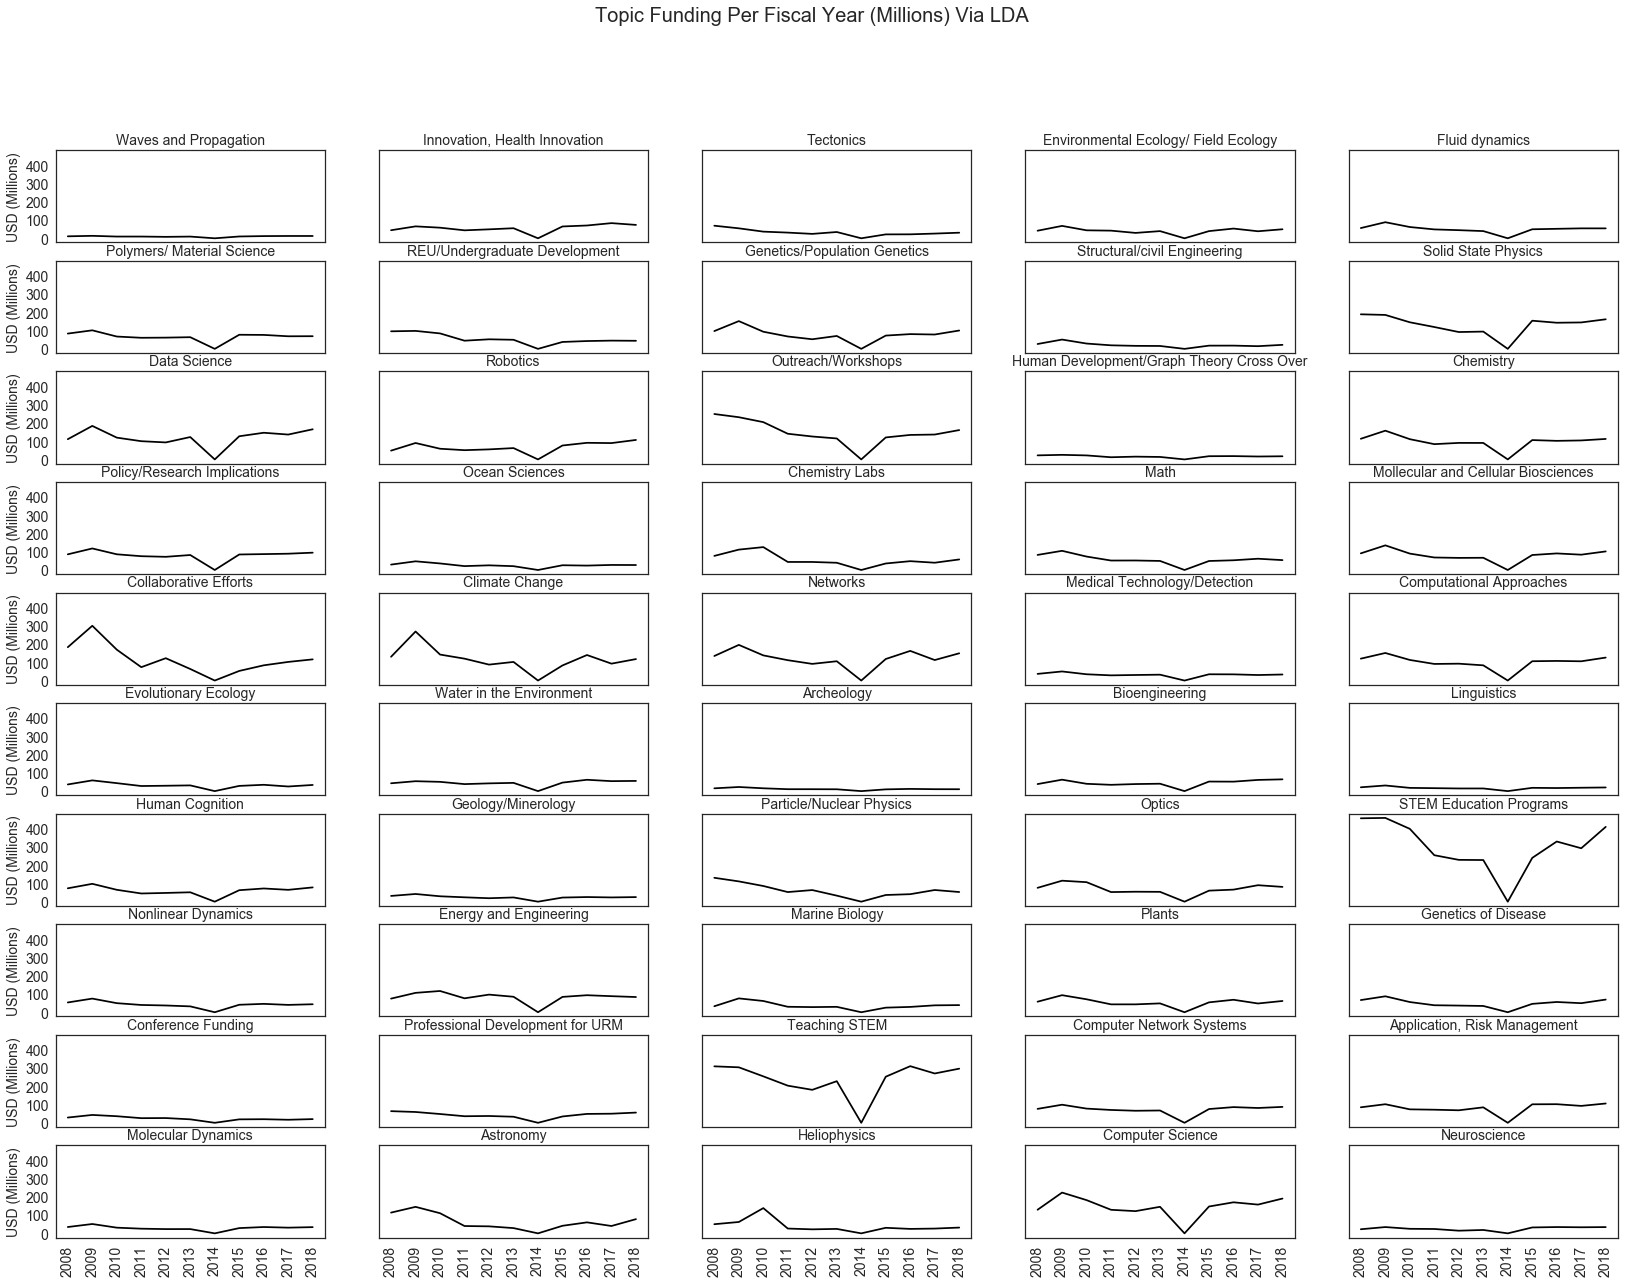

In [29]:
sns.set_style('white')
fig, ax = plt.subplots(10,5,sharex=True,sharey=True,figsize=(28,20))
top_num=0
for x in range(10):
    for y in range(5):
        shrunk['Topic_'+str(top_num)].plot(ax=ax[x,y],color='k')
        plt.sca(ax[x,y])
        plt.ylabel('USD (Millions)',size=14)
        plt.xticks(np.arange(2008,2019),rotation=90,size=14)
        plt.xlabel('')
        plt.title(titles[top_num],size=14)
        plt.yticks(range(0,500,100),size=14)
        top_num+=1
plt.suptitle('Topic Funding Per Fiscal Year (Millions) Via LDA',size=20)
plt.savefig('FundingChartsNSF.png',dpi=400,bbox_inches='tight')

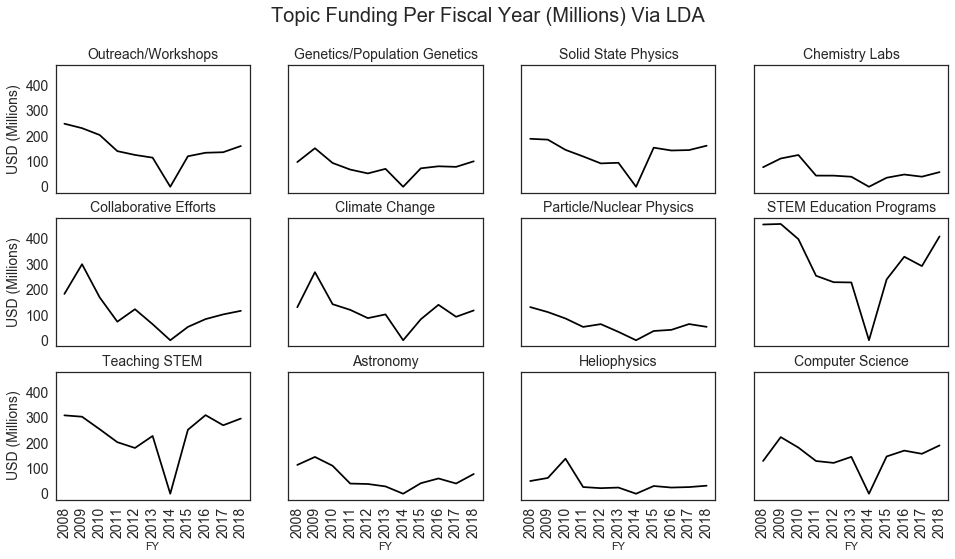

In [30]:
toi=[12,7,9,17,20,21,32,34,42,46,47,48]
sns.set_style('white')
fig, ax = plt.subplots(3,4,sharex=True,sharey=True,figsize=(16,8))
top_num=0
for x in range(3):
    for y in range(4):
        shrunk['Topic_'+str(toi[top_num])].plot(ax=ax[x,y],color='k')
        plt.sca(ax[x,y])
        plt.ylabel('USD (Millions)',size=14)
        plt.xticks(np.arange(2008,2019),rotation=90,size=14)
        plt.title(titles[toi[top_num]],size=14)
        plt.yticks(range(0,500,100),size=14)
        top_num+=1
plt.suptitle('Topic Funding Per Fiscal Year (Millions) Via LDA',size=20)
plt.savefig('FundingChartsNSF--Interesting Topics.png',dpi=400,bbox_inches='tight')